<img src="https://raw.githubusercontent.com/imedinam50/MCDI/main/MCDI.jpg">

<div style="text-align: right"> <H1> Proyecto final MCDI </H1></div>
<br><br><br>
<div style="text-align: right"> <H2> Asesor. Dr. Elio Atenógenes Villaseñor García </H2></div>
<br><br>

<H2>Ingeniería de datos</H2>
<br><br>
<H4><I> 
    Ismael Medina Muñoz
</I></H4>
<br>
<div style="text-align: right"> Fecha de entrega: 2022-0*-** </div>

# Introducción
## TODO

# Planteamiento del problema
La creación artística está siendo impactada por la inteligencia artificial. La música no es un campo ajeno a dicho impacto. La creación musical es un proceso que toma tiempo para el compositor. En un contexto de creación de obras artísticas usadas en productos como comerciales de productos, videojuegos, contenido audiovisual en internet, etc. se requiere de la producción acelerada.
Esta actividad de creación musical ha sido atribuida meramente a los humanos, tal cómo lo establece Morán Martinez, M (2009).

    La creación, la ejecución y la apreciación de la música obedecen fundamentalmente a la capacidad humana para descubrir patrones de sonido e identificarlos en ocasiones posteriores. Sin los procesos biológicos de percepción auditiva y sin consenso cultural sobre lo percibido, entre por lo menos algunos oyentes, no pueden existir ni música ni comunicación musical.

Si bien existen ya muchas investigaciones sobre la composición musical automatizada, la creación asistida e interactiva para los compositores es aún un reto para la investigación, tal como menciona Briot, J. (2021).

Para componer música necesitamos entonces de un generador de nuevas notas singulares o acordes basado en secuencias existentes, coherentes, pero principalmente consonantes, que ya sean parte de un corpus de entrenamiento.

En este proyecto se entrenará una red neuronal profunda para que sea un generador de un grupo de nuevas $n$-notas a un mismo tiempo a partir de dos vectores que representen secuencias de $n$-notas que ocurren a un mismo tiempo y cuya aparición en secuencia representaría grupos de $n$-notas que son consonantes. Este generador será un precursor a la asistencia en la composición de piezas de jazz para piano. Se escogió el género del jazz dado que éste representa un reto para los músicos por su complejidad y riqueza lingüística.

# Metodología propuesta y fundamentación
La composición musical consiste de crear secuencias de $n$-notas con $n = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}$ donde el silencio se representa por un conjunto de $0$-notas. Las $n$-notas ejecutadas en una secuencia $S$ deben ser agradables el oído humano, es decir, consonantes. Las partituras permiten registrar la música a través de escribir las $n$-notas colocadas en relación a su posición relativa en una secuencia $S$ dentro de los límites de un compás. Cada conjunto de $n$-notas tienen una duración que se mantienen bajo las reglas y límites propios de los compases.

La música es precursor del lenguaje hablado y por tanto mantiene una similitud con ésta, tal como establece Lozano(2013). Una oración sólo tiene coherencia si las palabras que la forman resultan en un significado para el receptor de la comunicación. Las oraciones forman párrafos y los signos de puntuación permiten agregar pausas y entonaciones que ayudan a que el cerebro del receptor consuma la información que el emisor pretendía.

Se escogió una fuente digital de partituras para modelar la secuencia $S$ de $n$-notas. El corpus provino entonces de __[musescore.com](https://musescore.com/)__. Desde este sitio se descargaron las partituras en formato **MSCZ** pertenecientes al género del jazz y de ahí se propone hacer la extracción de las $n$-notas asociadas al piano, ya que dichas partituras pueden tener más de un instrumento descrito en sus pentagramas.

Mediante la librería `ms3` se abrirán las partituras y de ellas se obtendrán las secuencias de $n$-notas asociadas al piano. Dichas $n$-notas ocurriendo en la misma posición de tiempo del compás se conocerán como rebanadas. Las secuencias de rebanadas de $n$-notas serán usadas para entrenar la red neuronal que predecirá la siguiente rebanada de $n$-notas en la secuencia. Este generador será el antecedente para la composición musical.

Este trabajo es similar al que ya se aplica para predecir la siguiente palabra o el siguiente número dada una secuencia previa y que ha sido modelado usando redes neuronales recurrentes (RNN).

Todos los conjuntos de datos intermedios en el procesamiento serán almacenados en archivos CSV dado el tiempo requerido para iterar el corpus y la capacidad que ofrece de segmentar el trabajo permitiendo retomar desde el paso último ejecutado.

# Implementación de la metodología
## Carga de librerías y las rutas del corpus

# Presentación de resultados
A continuación, se mostrarán los resultados del `accuracy` de los modelos entrenados.

### La música resultante
Con las predicciones hechas ya es posible generar las partituras y midis asociados a los compases propuestos para la asistencia en la creación musical. Las celdas a continuación generan dichos elementos.

In [2]:
import numpy as np
import pandas as pd
import music21
from music21 import *
import ast
from fractions import Fraction as frac
import glob
import datetime
import os
import re

## Variables de entorno donde se encuentra el binario de MuseScore
us = environment.UserSettings()
us['musicxmlPath'] = 'C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe'
us['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe'

In [3]:
output_folder = '.\\output\\'
root = os.walk(output_folder)
latest_subfolder = ''
latest_date = os.path.getctime(output_folder)

for (currentfolder, subfolders, files) in root:
    for subfolder in subfolders:
        if os.path.getctime(output_folder + subfolder) > latest_date:
            latest_subfolder = subfolder
            latest_date = os.path.getctime(output_folder + subfolder) 

working_folder = output_folder + latest_subfolder
file_pattern = working_folder + '\\n_notes_*_*_sequence.csv'

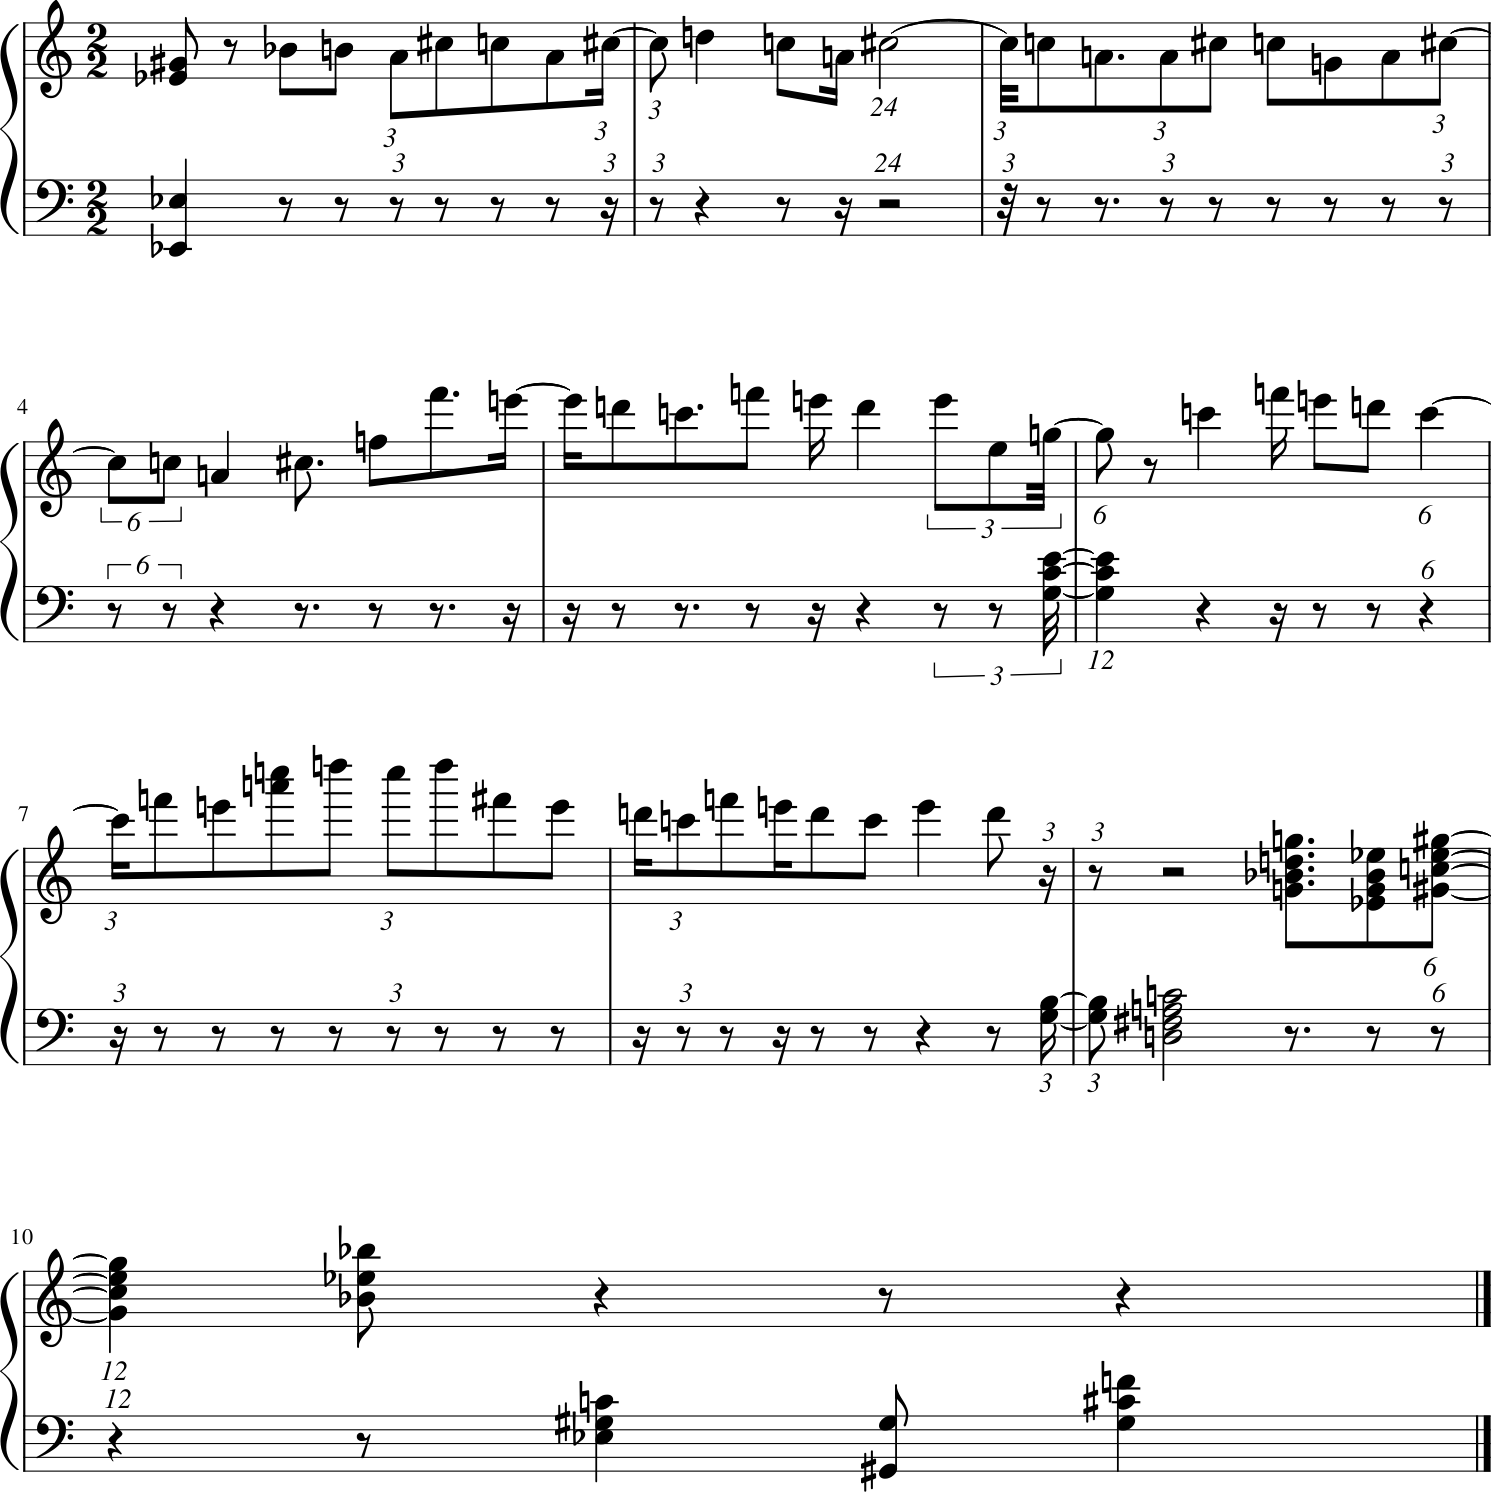

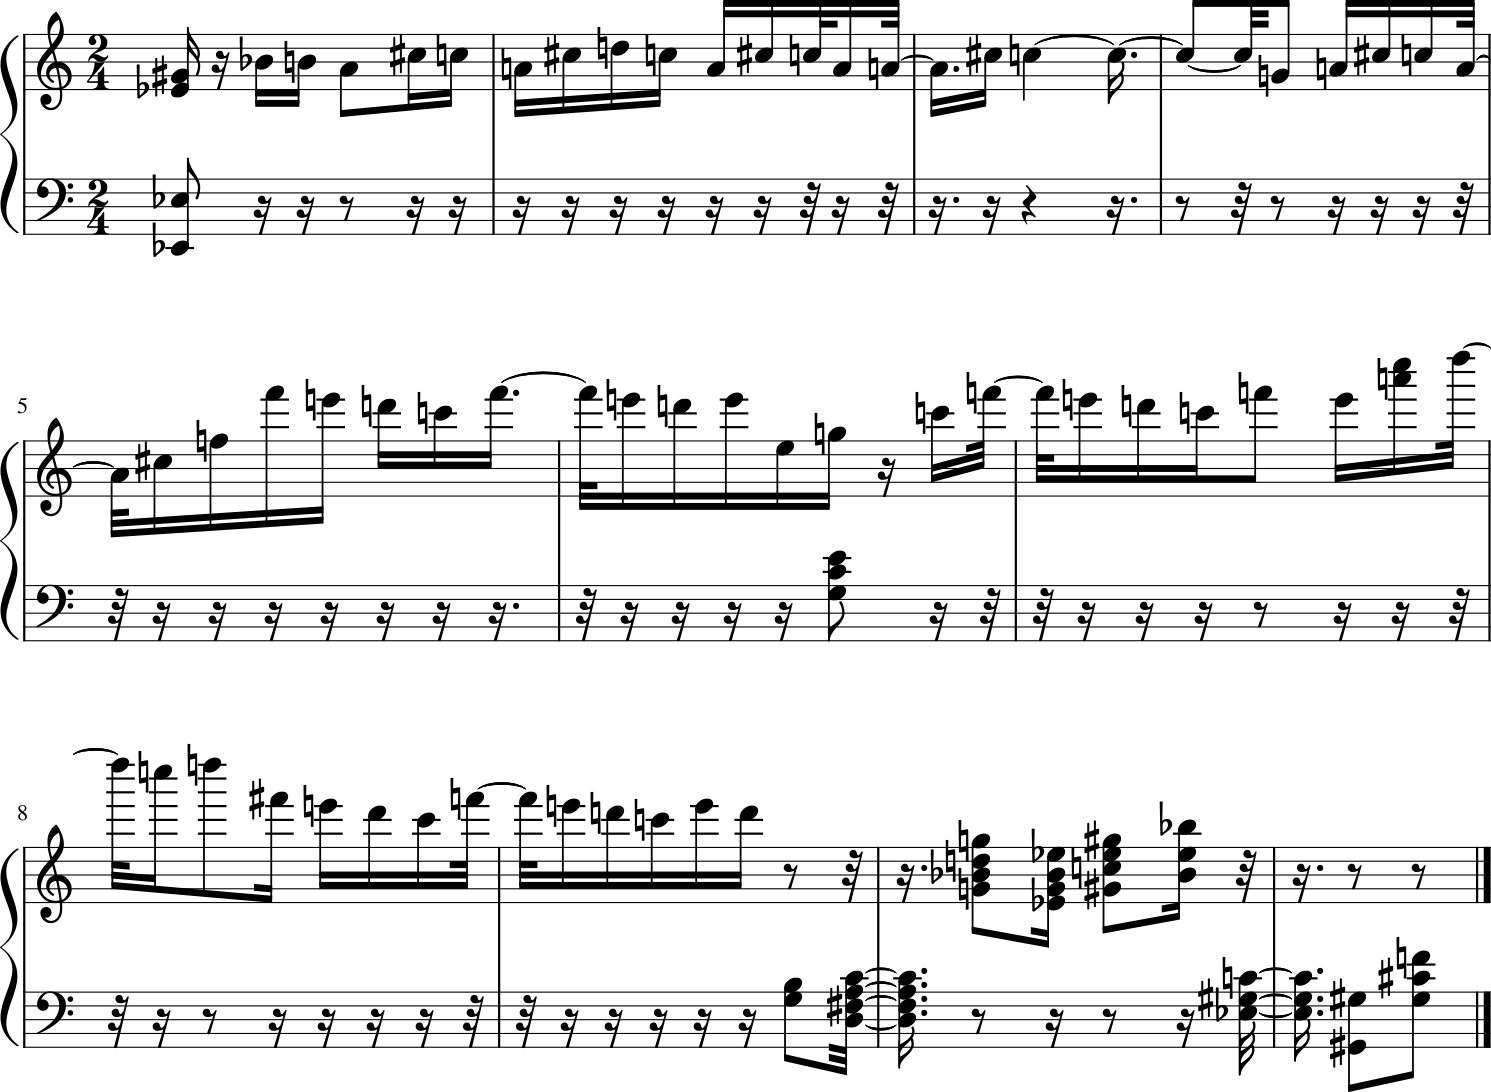

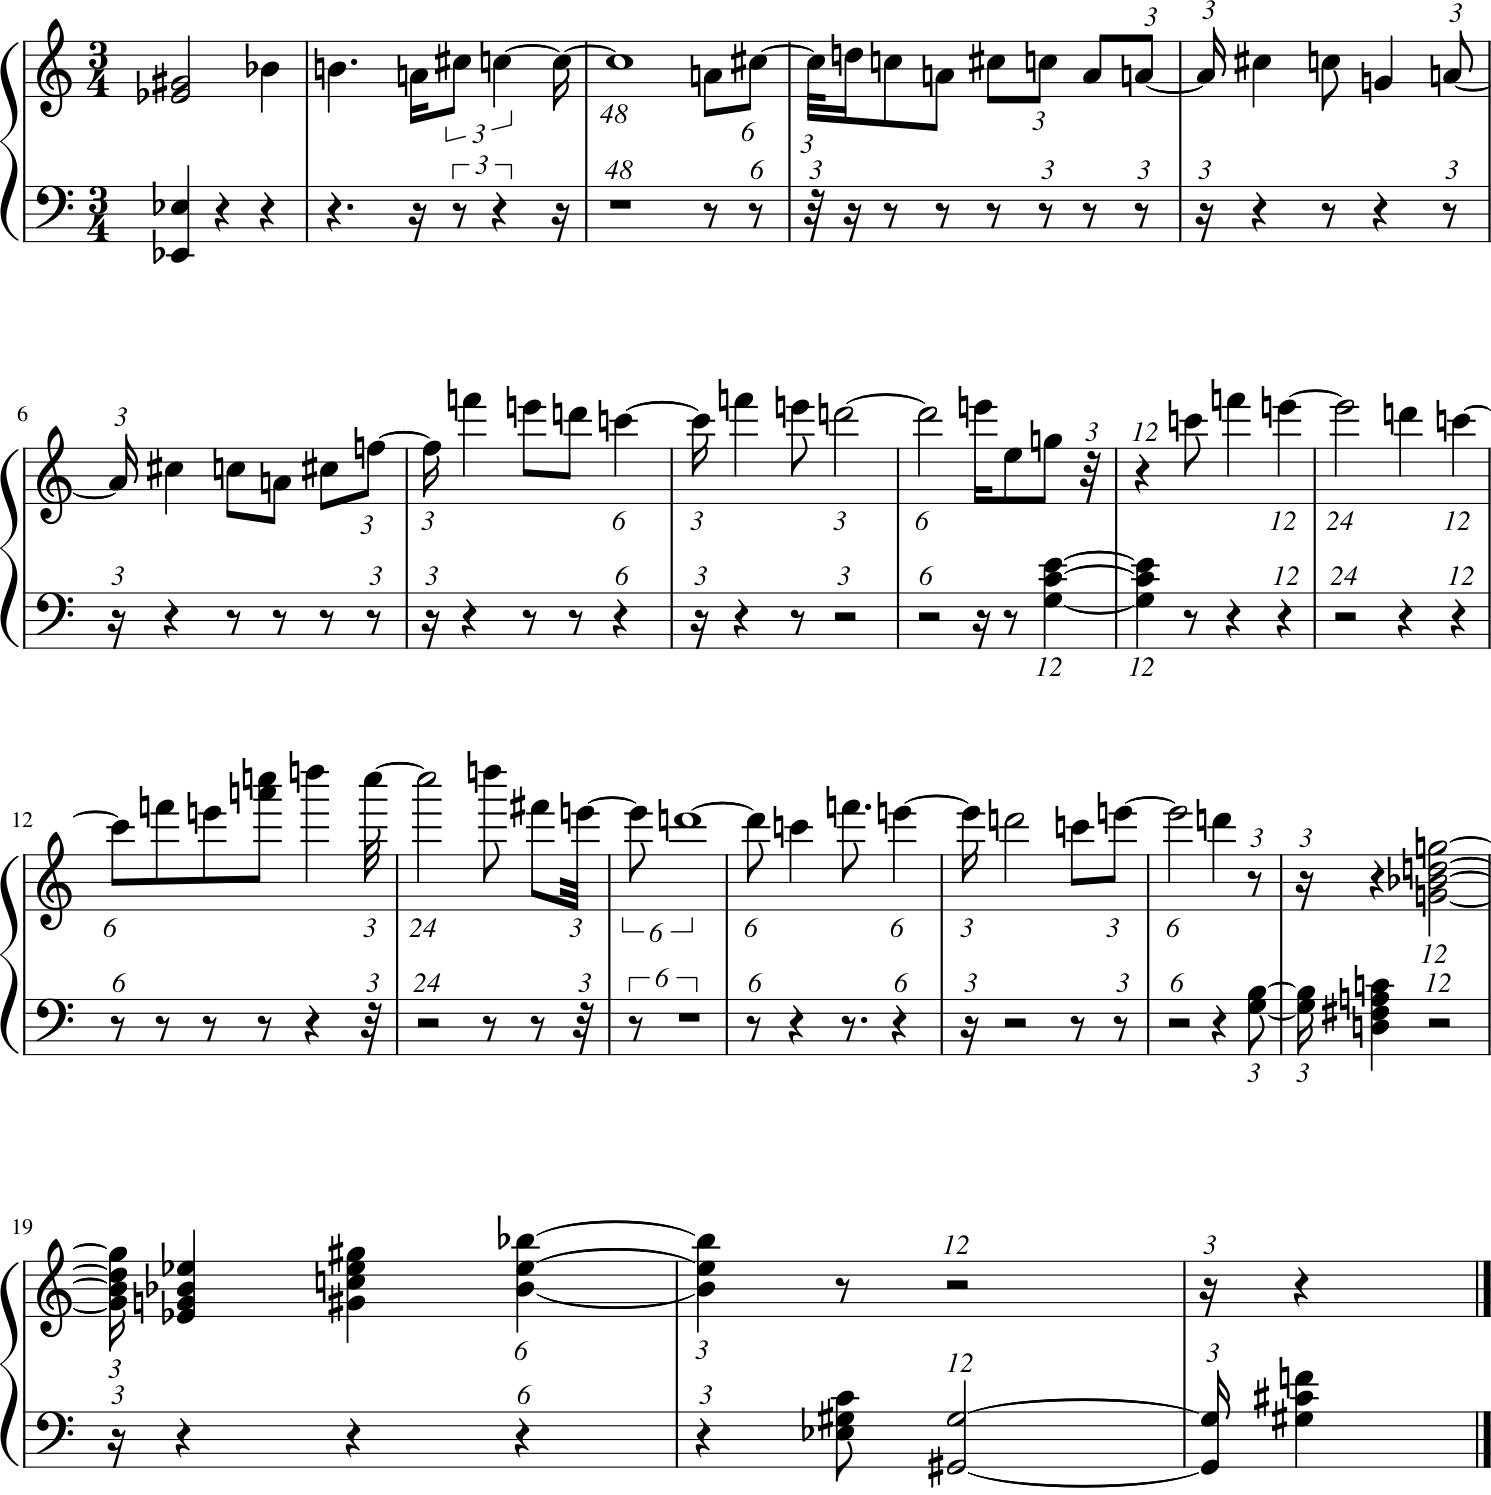

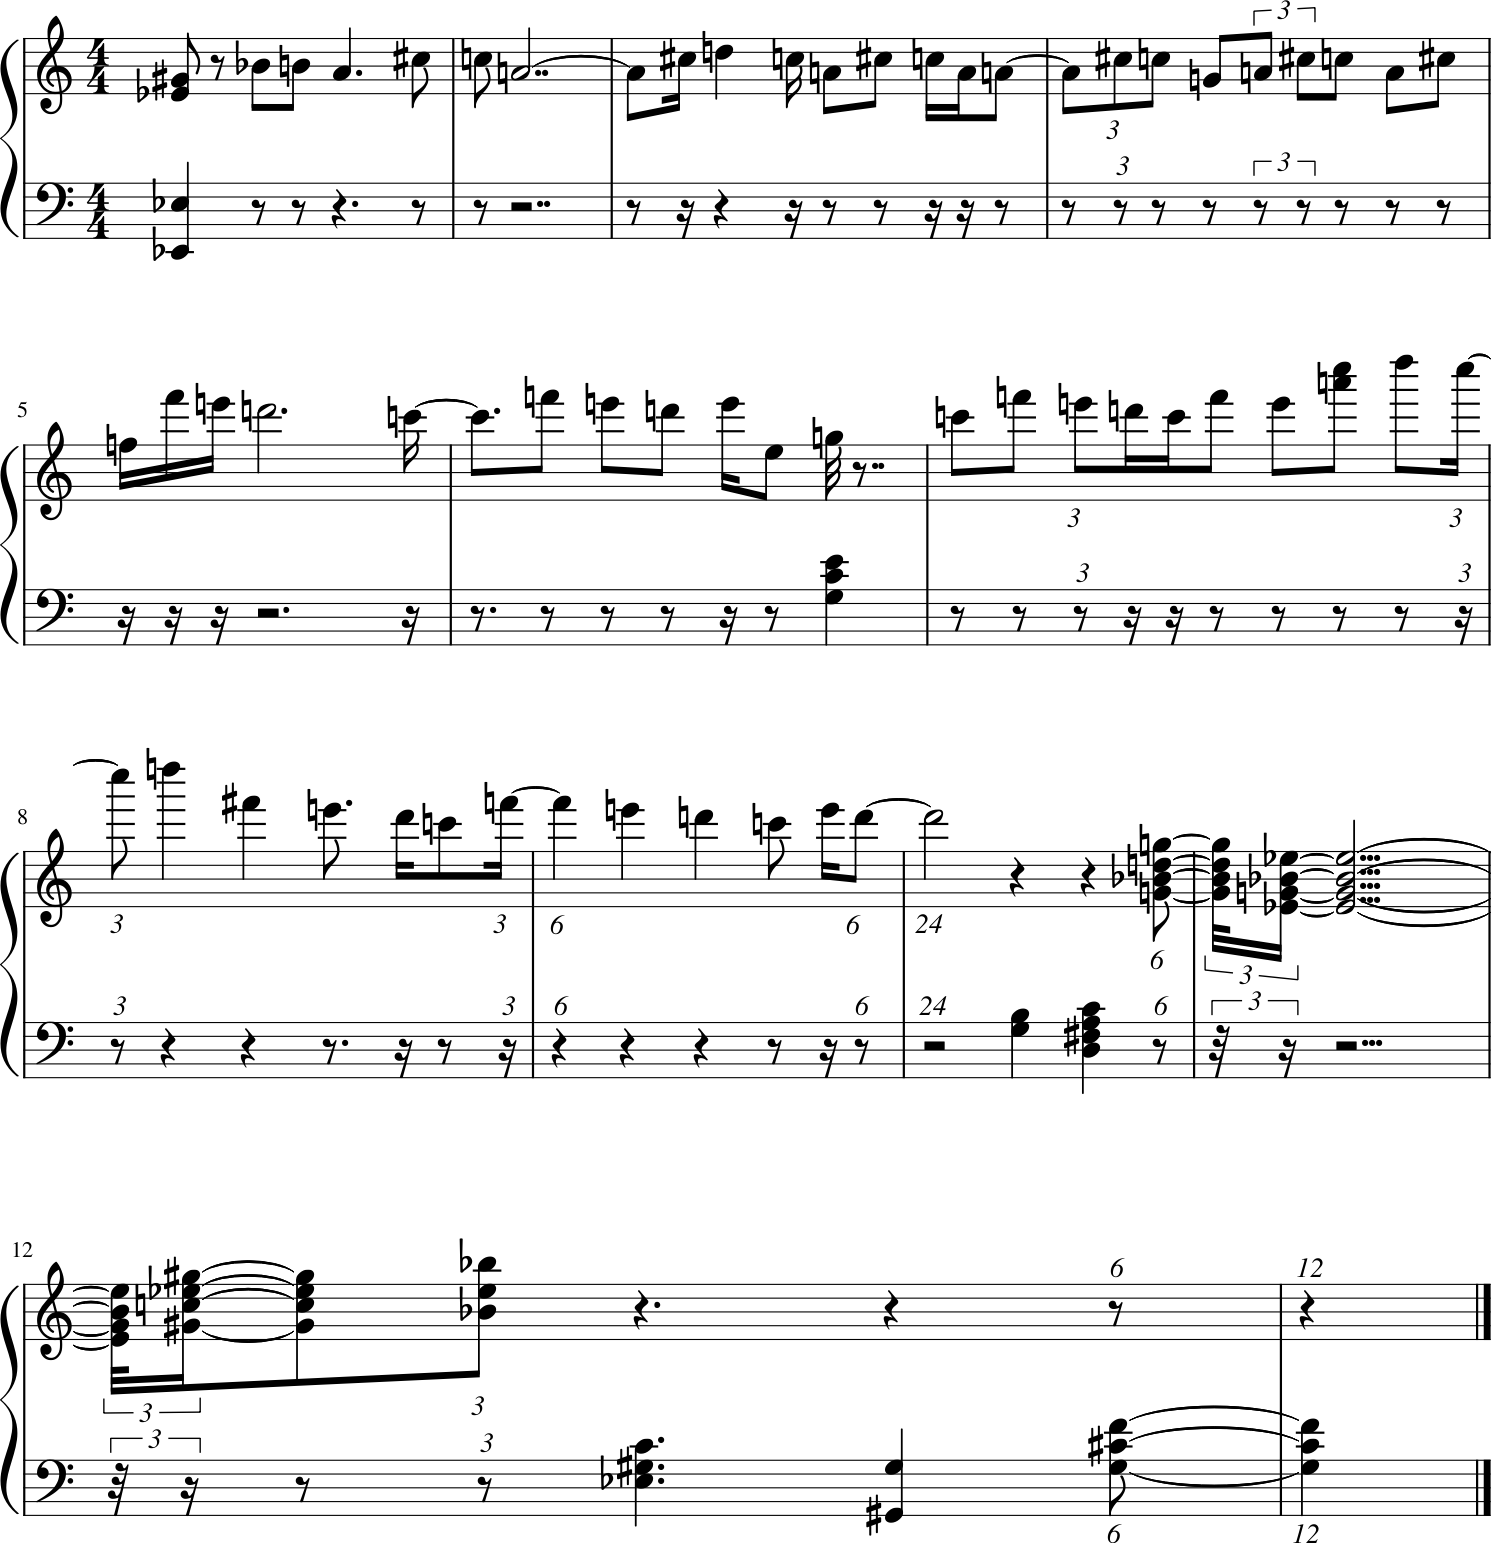

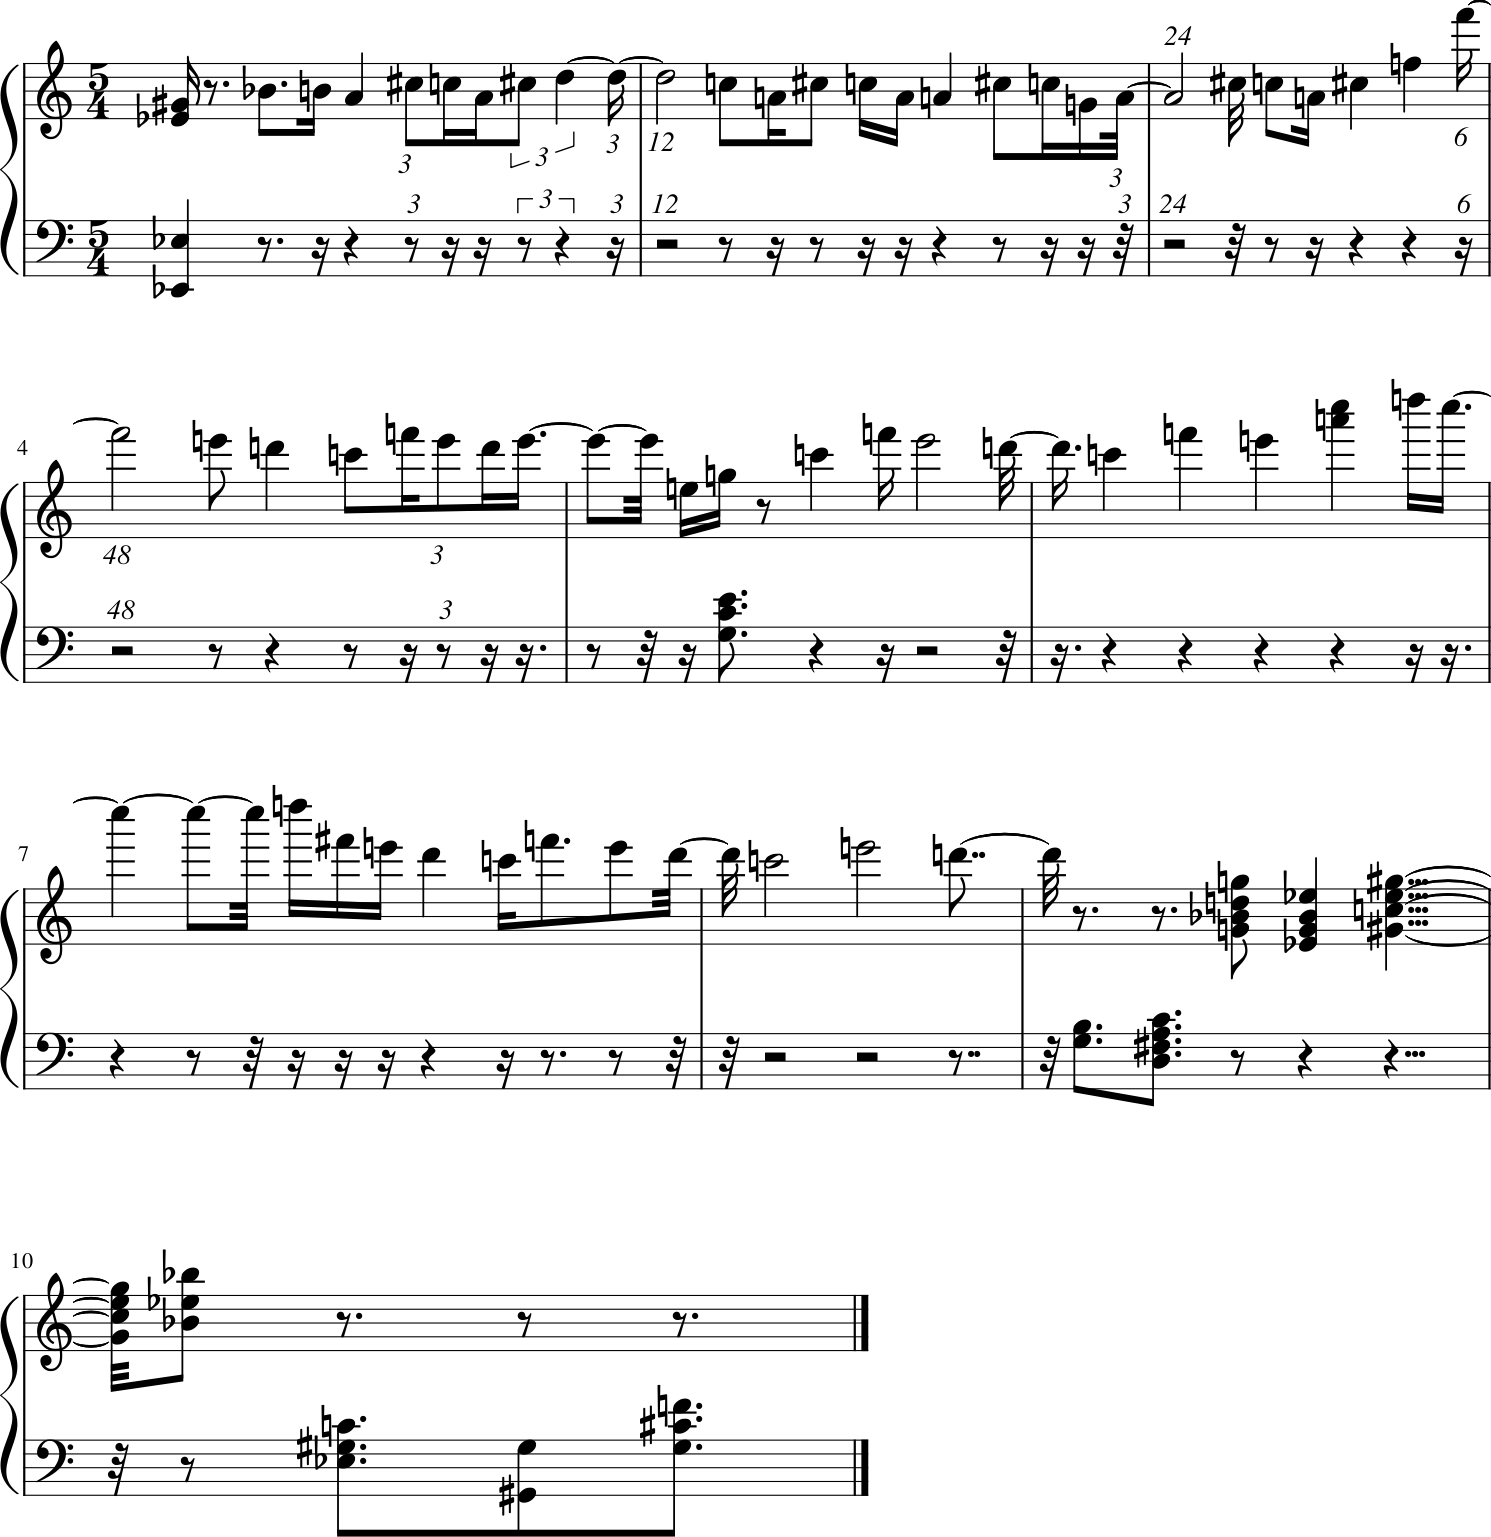

In [4]:
for file in glob.glob(file_pattern):
    time_signature = re.sub(r'.*\\n_notes_', '', file).replace("_sequence.csv", "").replace("_", "/")
    n_notes_sequence = pd.read_csv(file, index_col = 0)

    s = stream.Score()
    sequence_staff_C = []
    sequence_staff_F = []
    staff_C = stream.Part()
    staff_F = stream.Part()
    staff_C.insert(meter.TimeSignature(time_signature))
    staff_F.insert(meter.TimeSignature(time_signature))
    
    for key, row in n_notes_sequence.iterrows():
        staff_C_notes    = ast.literal_eval(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', row.staff01_notes))
        staff_C_duration = max([frac(x) for x in ast.literal_eval(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', row.staff01_durations))])
        staff_C_n_notes  = np.count_nonzero(staff_C_notes)
        staff_F_notes    = ast.literal_eval(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', row.staff02_notes))
        staff_F_duration = max([frac(x) for x in ast.literal_eval(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', row.staff02_durations))])
        staff_F_n_notes  = np.count_nonzero(staff_F_notes)

        if staff_C_n_notes == 0:
            sequence_staff_C.append(note.Rest(duration = duration.Duration(staff_F_duration * 4)))
        elif staff_C_n_notes == 1:
            sequence_staff_C.append(note.Note(staff_C_notes[0], 
                                                  duration = duration.Duration(staff_C_duration * 4)))
            if staff_C_duration < staff_F_duration:
                fill_staff_C_duration = staff_F_duration - staff_C_duration
                ##print(staff_F_duration, staff_C_duration, fill_staff_C_duration * 4)
                sequence_staff_C.append(note.Rest(duration = duration.Duration(fill_staff_C_duration * 4)))
        else:
            c_staff_C = []
            for staff_C_note in staff_C_notes:
                if staff_C_note > 0:
                    c_staff_C.append(note.Note(staff_C_note))

            sequence_staff_C.append(chord.Chord(c_staff_C, 
                                                  duration = duration.Duration(staff_C_duration * 4)))
            if staff_C_duration < staff_F_duration:
                fill_staff_C_duration = staff_F_duration - staff_C_duration
                ##print(fill_staff_C_duration * 4)
                sequence_staff_C.append(note.Rest(duration = duration.Duration(fill_staff_C_duration * 4)))

        if staff_F_n_notes == 0:
            sequence_staff_F.append(note.Rest(duration = duration.Duration(staff_C_duration * 4)))
        elif staff_F_n_notes == 1:
            sequence_staff_F.append(note.Note(staff_F_notes[0], 
                                                  duration = duration.Duration(staff_F_duration * 4)))
            if staff_F_duration < staff_C_duration:
                fill_staff_F_duration = staff_C_duration - staff_F_duration
                ##print(fill_staff_F_duration * 4)
                sequence_staff_F.append(note.Rest(duration = duration.Duration(fill_staff_F_duration * 4)))
        else:
            c_staff_F = []
            for staff_F_note in staff_F_notes:
                if staff_F_note > 0:
                    c_staff_F.append(note.Note(staff_F_note))

            sequence_staff_F.append(chord.Chord(c_staff_F, 
                                                  duration = duration.Duration(staff_F_duration * 4)))
            if staff_F_duration < staff_C_duration:
                fill_staff_F_duration = staff_C_duration - staff_F_duration
                ##print(fill_staff_F_duration * 4)                
                sequence_staff_F.append(note.Rest(duration = duration.Duration(fill_staff_F_duration * 4)))

                ##break
    staff_C.append(sequence_staff_C)
    staff_F.append(sequence_staff_F)

    s.insert(0, staff_C)
    s.insert(0, staff_F)            

    staffGroup1 = layout.StaffGroup([staff_C, staff_F],
                                    name='Piano', abbreviation='Piano', symbol='brace')
    staffGroup1.barTogether = 'Mensurstrich'
    s.insert(0, staffGroup1)
    s.show()
    s.show('midi')
    s.write('midi', fp=file.replace('.csv', '.midi'))
    s.write('musicxml.png', fp=file.replace('.csv', '.png'))

# Referencias

* Briot, J. (2021). From artificial neural networks to deep learning for music generation: history, concepts and trends. *Neural Comput & Applic 33*, 36-65.
* Ijas, A. H. (2 de Noviembre de 2019). *Build a simple predictive keyboard using python and Keras*. Obtenido de medium.com: https://medium.com/analytics-vidhya/build-a-simple-predictive-keyboard-using-python-and-keras-b78d3c88cffb
* Lozano Cruz, O. S.-G. (6 de Junio de 2013). El cerebro y la música. *Rev Med UV, Enero - Junio 2013*, págs. 17-22.
* Morán Martínez, M. C. (1 de Noviembre de 2009). Psicología y Música: inteligencia musical y desarrollo estético*. *Revista Digital Universitaria*, págs. 1-13.

